# Week 1 — NumPy Foundations for Data Science

**In this session we will cover** arrays, slicing (1D/2D/advanced), broadcasting, reshaping, axis ops, and a many exercises.

This practical session is designed to prepare you for **Pandas, near future modelling input shapes, and feature engineering**.

**Roadmap**

0. Introduction — Why NumPy
1. Arrays & Memory Model  
   1.1 Python Lists vs NumPy Arrays  
   1.2 Numpy Array Attributes
   1.3 Creating NumPy Arrays
2. Mastering Slicing & Indexing (Core for `.iloc` later)  
   2.1 1D indexing and slicing  
   2.2 2D slicing — rows, columns, blocks  
3. Reshaping, Stacking, Concatenation
4. Broadcasting
5. Vectorization
6. Axis Operations & Aggregations  
7. Transposing
8. Challenging Exercises
9. Let's practice a bit more

Appendix — NumPy Cheatsheet & Pitfalls


## Introduction — Why NumPy
NumPy is the numerical engine behind Pandas, SciPy, scikit‑learn, and deep learning frameworks. To build ML models or clean data effectively:
- Think in **arrays** (not lists) and **shapes**.
- Use **slicing** (prepares you for `.iloc`).
- Prefer **broadcasting & vectorization** over loops.
- Control **axis** semantics for aggregation.

> We'll practice with clean, production‑like exercises to build intuition.

> Let's get started with importing NumPy!


In [1]:
import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(precision=3, suppress=True)

## 1. Arrays & Memory Model

### 1.1. Python Lists vs NumPy Arrays

NumPy arrays store data in contiguous memory with a single `dtype`, enabling fast vectorized operations. This contrasts with Python lists, which can store elements of different types and are stored in a scattered manner in memory, leading to slower operations for numerical computations. This contiguous memory layout and uniform data type are key to NumPy's performance advantages.

In [2]:
lst = [1, 2, 3]

arr = np.array([1, 2, 3])

print(type(lst))
print(type(arr))

<class 'list'>
<class 'numpy.ndarray'>


### 1.2. NumPy Array Attributes

NumPy arrays have several important attributes that provide information about their structure and the data they hold. Some key attributes are:

- `shape`: A tuple that indicates the size of the array along each dimension.
- `dtype`: The data type of the elements in the array.
- `ndim`: The number of dimensions (axes) of the array.
- `size`: The total number of elements in the array.

In [3]:
# thats how we create a 2d numpy array from scratch

arr = np.array([1, 2, 3])

print(f'Array:\n{arr}', end='\n\n')
print(f'Shape: {arr.shape}', end='\n\n')
print(f'Data type: {arr.dtype}', end='\n\n')
print(f'Number of dimensions: {arr.ndim}', end='\n\n')
print(f'Size: {arr.size}')

Array:
[1 2 3]

Shape: (3,)

Data type: int64

Number of dimensions: 1

Size: 3


### 1.3. Creating NumPy arrays
Most of our exercises will include ways to generate NumPy arrays and matrices. some of those are presented below:

`np.arange(start, stop, step)`: Creates an array with evenly spaced values within a given interval. It works similarly to Python's built-in `range()` function.

- `start`: The beginning of the interval (optional, default is 0).
- `stop`: The end of the interval (exclusive).
- `step`: The spacing between values (optional, default is 1).

**Examples**:

- `np.arange(10)`: Generates an array `[0 1 2 3 4 5 6 7 8 9]`

- `np.arange(2, 10, 2)`: Generates an array `[2 4 6 8]`

In [4]:
np.arange(10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

**Try it too!**

In [5]:
# create a numpy array with [1, 2, 3] and print it
np.array([1, 2, 3])

array([1, 2, 3])

In [6]:
# create a numpy array with arange and print it
np.arange(5)

array([0, 1, 2, 3, 4])

Besides `np.arange` here are other common ways to create NumPy arrays:

In [7]:
# Create an array of zeros
zeros_arr = np.zeros((3, 4))
print("np.zeros((3, 4)):\n", zeros_arr)

# Create an array of ones
ones_arr = np.ones((2, 5))
print("\nnp.ones((2, 5)):\n", ones_arr)

# Create an array filled with a specific value
full_arr = np.full((4, 2), 7)
print("\nnp.full((4, 2), 7):\n", full_arr)

# Create an identity matrix
identity_arr = np.eye(5)
print("\nnp.eye(5):\n", identity_arr)

# Create an array with evenly spaced values over a specified interval
linspace_arr = np.linspace(0, 10, 5) # 5 values between 0 and 10 (inclusive)
print("\nnp.linspace(0, 10, 5):\n", linspace_arr)

np.zeros((3, 4)):
 [[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]

np.ones((2, 5)):
 [[1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]]

np.full((4, 2), 7):
 [[7 7]
 [7 7]
 [7 7]
 [7 7]]

np.eye(5):
 [[1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]]

np.linspace(0, 10, 5):
 [ 0.   2.5  5.   7.5 10. ]


### Exercise 1.1 — Create & Inspect
Create an array of shape `(4, 5)` with values `0..19`. Print its `shape`, `dtype`, and `ndim`.

In [15]:
# manually is harder right...
arr = np.array([
    [0, 1, 2, 3, 4],
    [5, 6, 7, 8, 9],
    [10,11,12,13,14],
    [15,16,17,18,19]
])

print("Array:\n", arr)
print("Shape:", arr.shape)
print("Dtype:", arr.dtype)
print("Ndim:", arr.ndim)

Array:
 [[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]]
Shape: (4, 5)
Dtype: int64
Ndim: 2


### 1.4. Reshape

Reshaping allows you to change the dimensions of an array without changing the data it contains.

**This is the combination of `np.arange()` and `reshape()` to create multi-dimensional arrays.**
```python
np.arange(12).reshape(3, 4)

>>> array([[ 0,  1,  2,  3],
           [ 4,  5,  6,  7],
           [ 8,  9, 10, 11]])
```

**The number of elements in the array must match the product of the dimensions specified in `reshape()`.**

**Try it too!**

In [16]:
# create a numpy array with arange and reshape it to (5,4) and print it
arr = np.arange(20).reshape(4, 5)
arr

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19]])

In [ ]:
# create a numpy array with arange and reshape it to (5, 4, 2) and print it
# notice that the number inside the arange is the multiplication of 5 * 4 * 2
arr = np.arange(40).reshape(5, 4, 2)
arr

array([[[ 0,  1],
        [ 2,  3],
        [ 4,  5],
        [ 6,  7]],

       [[ 8,  9],
        [10, 11],
        [12, 13],
        [14, 15]],

       [[16, 17],
        [18, 19],
        [20, 21],
        [22, 23]],

       [[24, 25],
        [26, 27],
        [28, 29],
        [30, 31]],

       [[32, 33],
        [34, 35],
        [36, 37],
        [38, 39]]])

### Exercise 1.2 — Reshape
Create a 1D array using `np.arange` with 12 elements. Reshape it into a 2D array with shape (3, 4) and then reshape the 2D array into a 3D array with shape (2, 3, 2). Print the shape of each array after reshaping.

In [20]:
# 1D array with 12 elements
arr_1d = np.arange(12)
print("1D shape:", arr_1d.shape)

# Reshape into 2D (3, 4)
arr_2d = arr_1d.reshape(3, 4)
print("2D shape:", arr_2d.shape)

# Reshape into 3D (2, 3, 2)
arr_3d = arr_2d.reshape(2, 3, 2)
print("3D shape:", arr_3d.shape)


1D shape: (12,)
2D shape: (3, 4)
3D shape: (2, 3, 2)


### 1.3. Typed arrays

We can specify the data type of the elements in a NumPy array using the `dtype` parameter when creating the array. This is useful for optimizing memory usage and ensuring that the data is stored in the desired format.

**Examples:**

```python
np.array([1, 2, 3], dtype=np.float32)
>>> array([1., 2., 3.], dtype=float32)
```

```python
np.arange(10, dtype=np.int16)
>>> array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int16)
```
### Exercise 1.1 — Typed arrays

Create a float32 array of shape `(3, 3)` with values `0..8` and print its `dtype`


In [21]:
arr = np.arange(9, dtype=np.float32).reshape(3, 3)
print(arr.dtype)


float32


## 2. Mastering Slicing & Indexing (Core for `.iloc` later)

### 2.1. 1D Indexing & Slicing
Accessing elements or subsets of a 1D array is done using indexing and slicing.

- **Indexing:** Use square brackets `[]` with an integer to access a single element.
- **Slicing:** Use the colon `:` to specify a range of elements. The syntax is `[start:stop:step]`.
    - `start`: The starting index (inclusive). If omitted, it defaults to the beginning of the array.
    - `stop`: The ending index (exclusive). If omitted, it defaults to the end of the array.
    - `step`: The step size between elements. If omitted, it defaults to 1.

Negative indices count from the end of the array. For example, `[-1]` is the last element, `[-2]` is the second to last, and so on.

In [23]:
arr = np.arange(10)
print("Array:", arr)

# Indexing
print("First element:", arr[0])
print("Fifth element:", arr[4])
print("Last element:", arr[-1])

# Slicing
print("\nElements from index 2 to 6:", arr[2:7])
print("First five elements:", arr[:5])
print("Elements from index 5 onwards:", arr[5:])
print("Every second element:", arr[::2])
print("Reverse array:", arr[::-1])


Array: [0 1 2 3 4 5 6 7 8 9]
First element: 0
Fifth element: 4
Last element: 9

Elements from index 2 to 6: [2 3 4 5 6]
First five elements: [0 1 2 3 4]
Elements from index 5 onwards: [5 6 7 8 9]
Every second element: [0 2 4 6 8]
Reverse array: [9 8 7 6 5 4 3 2 1 0]


### Exercise 2.1 — 1D slicing drills
From `x = np.arange(20)`, produce:  
a) `x` without the first and last 2 elements.  
b) Elements at odd positions (1,3,5,...) using slicing.  
c) Reverse `x`.


In [24]:
x = np.arange(20)

# a) x without the first and last 2 elements
a = x[2:-2]
print("a:", a)

# b) Elements at odd positions
b = x[1::2]
print("b:", b)

# c) Reverse x
c = x[::-1]
print("c:", c)


a: [ 2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17]
b: [ 1  3  5  7  9 11 13 15 17 19]
c: [19 18 17 16 15 14 13 12 11 10  9  8  7  6  5  4  3  2  1  0]


### 2.2. 2D Slicing — Rows, Columns, Blocks
For 2D arrays (matrices), you use a comma to separate the slicing for each dimension (axis). The syntax is `[row_slice, column_slice]`.

- To select a specific row, use the row index and a colon for the column slice (e.g., `M[2, :]` selects the third row).
- To select a specific column, use a colon for the row slice and the column index (e.g., `M[:, 3]` selects the fourth column).
- To select a block or submatrix, specify the slice for both rows and columns (e.g., `M[1:4, 1:4]` selects rows 1 to 3 and columns 1 to 3).
- Use `:` by itself to select all elements along that axis.

In [25]:
M = np.arange(25).reshape(5,5)
row2 = M[2,:]
col3 = M[:,3]
block = M[1:4, 1:4]
row2, col3, block

(array([10, 11, 12, 13, 14]),
 array([ 3,  8, 13, 18, 23]),
 array([[ 6,  7,  8],
        [11, 12, 13],
        [16, 17, 18]]))

### Exercise 2.2 — Extract submatrices
From `G = np.arange(49).reshape(7,7)`, extract:  
a) Center 3×3 block.  
b) Top‑left 2×4 block.  
c) Last 3 rows and last 2 columns (as a block).


In [26]:
G = np.arange(49).reshape(7,7)
G

array([[ 0,  1,  2,  3,  4,  5,  6],
       [ 7,  8,  9, 10, 11, 12, 13],
       [14, 15, 16, 17, 18, 19, 20],
       [21, 22, 23, 24, 25, 26, 27],
       [28, 29, 30, 31, 32, 33, 34],
       [35, 36, 37, 38, 39, 40, 41],
       [42, 43, 44, 45, 46, 47, 48]])

In [27]:
# a) Center 3×3 block
a = G[2:5, 2:5]
print("a:\n", a)

# b) Top-left 2×4 block
b = G[:2, :4]
print("\nb:\n", b)

# c) Last 3 rows and last 2 columns
c = G[-3:, -2:]
print("\nc:\n", c)

a:
 [[16 17 18]
 [23 24 25]
 [30 31 32]]

b:
 [[ 0  1  2  3]
 [ 7  8  9 10]]

c:
 [[33 34]
 [40 41]
 [47 48]]


### Exercise 2.3 Steps, Negative Indices
Use steps to subsample

From `G = np.arange(36).reshape(6,6)`

We want to obtain:

````
array([[ 5,  4,  3,  2,  1,  0],
       [17, 16, 15, 14, 13, 12],
       [29, 28, 27, 26, 25, 24]])
````


In [28]:
G = np.arange(36).reshape(6,6)
G

array([[ 0,  1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10, 11],
       [12, 13, 14, 15, 16, 17],
       [18, 19, 20, 21, 22, 23],
       [24, 25, 26, 27, 28, 29],
       [30, 31, 32, 33, 34, 35]])

## 3. Reshaping, Stacking, Concatenation

Reshape, stacking and concatenation are powerful tools in NumPy that allow you to manipulate the structure of your arrays in various ways. Here are some common operations:

- `arr.reshape(new_shape)`: Changes the shape of an array without changing its data. The new shape must be compatible with the original shape.
- `np.vstack((arr1, arr2))`: Stacks arrays vertically (row-wise).
- `np.hstack((arr1, arr2))`: Stacks arrays horizontally (column-wise).
- `np.concatenate((arr1, arr2), axis=0 or 1)`: Joins a sequence of arrays along an existing axis.

For example:

```python
A = np.array([[1, 2], [3, 4]])
B = np.array([[5, 6], [7, 8]])
C = np.vstack((A, B))  # Vertical stack
D = np.hstack((A, B))  # Horizontal stack
E = np.concatenate((A, B), axis=0)  # Concatenate along rows
F = np.concatenate((A, B), axis=1)  # Concatenate along columns

print("Vertical Stack:\n", C)
print("Horizontal Stack:\n", D)
print("Concatenate along rows:\n", E)
print("Concatenate along columns:\n", F)
```


In [29]:
# check the result if each operation
A = np.array([[1, 2], [3, 4]])
B = np.array([[5, 6], [7, 8]])
C = np.vstack((A, B))  # Vertical stack
D = np.hstack((A, B))  # Horizontal stack
E = np.concatenate((A, B), axis=0)  # Concatenate along rows
F = np.concatenate((A, B), axis=1)  # Concatenate along columns

print("Vertical Stack:\n", C)
print("Horizontal Stack:\n", D)
print("Concatenate along rows:\n", E)
print("Concatenate along columns:\n", F)

Vertical Stack:
 [[1 2]
 [3 4]
 [5 6]
 [7 8]]
Horizontal Stack:
 [[1 2 5 6]
 [3 4 7 8]]
Concatenate along rows:
 [[1 2]
 [3 4]
 [5 6]
 [7 8]]
Concatenate along columns:
 [[1 2 5 6]
 [3 4 7 8]]


### Exercise 3.1 — Reshape & Stack
Create two 2D arrays `A` and `B` of shape `(2, 3)` with values `0..5` and `6..11` respectively.

Stack them **vertically** and **horizontally**, and then **concatenate** them along both axes. Print the resulting arrays.

In [30]:
A = np.arange(6).reshape(2, 3)
B = np.arange(6, 12).reshape(2, 3)

# Vertical stack (rows increase)
v = np.vstack([A, B])
print("Vertical stack:\n", v)

# Horizontal stack (columns increase)
h = np.hstack([A, B])
print("\nHorizontal stack:\n", h)

# Concatenate along axis 0 (same as vertical)
c0 = np.concatenate([A, B], axis=0)
print("\nConcatenate axis=0:\n", c0)

# Concatenate along axis 1 (same as horizontal)
c1 = np.concatenate([A, B], axis=1)
print("\nConcatenate axis=1:\n", c1)

Vertical stack:
 [[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]]

Horizontal stack:
 [[ 0  1  2  6  7  8]
 [ 3  4  5  9 10 11]]

Concatenate axis=0:
 [[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]]

Concatenate axis=1:
 [[ 0  1  2  6  7  8]
 [ 3  4  5  9 10 11]]


## 4. Broadcasting

Broadcasting is a powerful mechanism that allows NumPy to perform operations on arrays of different shapes in a way that makes sense mathematically. It works by "stretching" the smaller array across the larger one so that they have compatible shapes for element-wise operations.

For example in a given numpy array `A` of shape `(3, 4)`, if you want to add a 1D array `b` of shape `(4,)` to each row of `A`, NumPy will automatically "broadcast" `b` across the rows of `A`. This means that `b` is treated as if it were repeated for each row, allowing the addition to be performed element-wise.

**Note that `b` must have a shape that is compatible with `A` for broadcasting to work.**

```python
A = np.array([[1, 2, 3, 4],
              [5, 6, 7, 8],
              [9, 10, 11, 12]])

b = np.array([10, 20, 30, 40])

C = A + b

print(C)

>>> array([[11, 22, 33, 44],
           [15, 26, 37, 48],
           [19, 30, 41, 52]])
```

### Exercise 4.1 — Broadcasting drills

Given a 2D array `M = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])`
- a) Add `[10, 20, 30]` to each row of `M`.
- b) Subtract `[1, 2, 3]` from each column of `M`.
- c) Multiply each element of `M` by `2`.

In [31]:
M = np.array([[1, 2, 3],
              [4, 5, 6],
              [7, 8, 9]])

# a) Add [10, 20, 30] to each row
a = M + np.array([10, 20, 30])
print("a:\n", a)

# b) Subtract [1, 2, 3] from each column
b = M - np.array([1, 2, 3]).reshape(3, 1)
print("\nb:\n", b)

# c) Multiply each element by 2
c = M * 2
print("\nc:\n", c)


a:
 [[11 22 33]
 [14 25 36]
 [17 28 39]]

b:
 [[0 1 2]
 [2 3 4]
 [4 5 6]]

c:
 [[ 2  4  6]
 [ 8 10 12]
 [14 16 18]]


## 5. Vectorization

Vectorization refers to the process of performing operations on entire arrays or large chunks of data at once, rather than using explicit loops to iterate over individual elements. This approach leverages optimized, low-level implementations in libraries like NumPy, which can lead to significant performance improvements.

**Examples**:

Given two 1D arrays:
```python
a = np.array([1, 2, 3])
b = np.array([4, 5, 6])
```
- Element-wise sum
    ```python
    sum_ab = a + b  # array([5, 7, 9])
    ```
- Element-wise product
    ```python
    prod_ab = a * b  # array([ 4, 10, 18])
    ```
- Dot product
    ```python
        dot_ab = np.dot(a, b) # 32 -> this is equivalent to np.sum(a * b)
    ```
- Euclidean distance
    ```python
    euclidean_dist = np.linalg.norm(a - b)  # 5.196152422 -> this is equivalent to np.sqrt(np.sum((a - b) ** 2))
    ```

### Exercise 5.1 — Vectorized operations

Given two 1D arrays `a = np.array([1, 2, 3])` and `b = np.array([4, 5, 6])`, compute their:

- a) Element-wise sum.
- b) Element-wise product.
- c) Dot product.
- d) Euclidean distance between `a` and `b`.

In [32]:
a = np.array([1, 2, 3])
b = np.array([4, 5, 6])

# a) Element-wise sum
s = a + b
print("a:", s)

# b) Element-wise product
p = a * b
print("b:", p)

# c) Dot product
d = a @ b
print("c:", d)

# d) Euclidean distance
e = np.sqrt(np.sum((a - b) ** 2))
print("d:", e)


a: [5 7 9]
b: [ 4 10 18]
c: 32
d: 5.196152422706632


## 6 Axis Operations & Aggregations

Many NumPy functions allow you to specify an `axis` parameter to control the direction of the operation. This is particularly useful for aggregations like sum, mean, max, etc.

The best way to understand axis operations is to think of them in terms of rows and columns in a 2D array (matrix).

### Exercise 6.1 — Axis sums
Given a 2D array `M = np.arange(1, 13).reshape(3, 4)`, compute:  
a) Sum of each column.  
b) Sum of each row.

Tips:
- Use `np.sum()` function with the `axis` parameter to compute these sums along the desired axis.

In [33]:
M = np.arange(1, 13).reshape(3, 4)

# a) Sum of each column
a = np.sum(M, axis=0)
print("a:", a)

# b) Sum of each row
b = np.sum(M, axis=1)
print("b:", b)


a: [15 18 21 24]
b: [10 26 42]


### Exercise 6.2 — Axis means
Given a 2D array `M = np.arange(1, 13).reshape(3, 4)`, compute:  
a) Mean of each column.  
b) Mean of each row.

Tips:
- Use `np.sum()` and `np.mean()` functions with the `axis` parameter to compute these statistics along the desired axis.

In [34]:
M = np.arange(1, 13).reshape(3, 4)

# a) Mean of each column
a = np.mean(M, axis=0)
print("a:", a)

# b) Mean of each row
b = np.mean(M, axis=1)
print("b:", b)


a: [5. 6. 7. 8.]
b: [ 2.5  6.5 10.5]


### Exercise 6.3 — Axis max/min
Given a 2D array `M = np.arange(1, 13).reshape(3, 4)`, compute:  
a) Max of each column.  
b) Min of each row.

Tips:
- Use `np.max()` and `np.min()` functions with the `axis` parameter to compute these statistics along the desired axis.

In [35]:
M = np.arange(1, 13).reshape(3, 4)

# a) Max of each column
a = np.max(M, axis=0)
print("a:", a)

# b) Min of each row
b = np.min(M, axis=1)
print("b:", b)


a: [ 9 10 11 12]
b: [1 5 9]


### Exercise 6.4 — Axis std/var
Given a 2D array `M = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])`, compute:  
a) Standard deviation of each column.
b) Variance of each row.

Tips:
- Use `np.std()` and `np.var()` functions with the `axis` parameter to compute these statistics along the desired axis.

In [36]:
M = np.array([[1, 2, 3],
              [4, 5, 6],
              [7, 8, 9]])

# a) Standard deviation of each column
a = np.std(M, axis=0)
print("a:", a)

# b) Variance of each row
b = np.var(M, axis=1)
print("b:", b)


a: [2.449 2.449 2.449]
b: [0.667 0.667 0.667]


### Exercise 6.5 — Axis argmax/argmin

`argmax` and `argmin` return the indices of the maximum and minimum values along a specified axis.

Given a 2D array `M = np.array([[1, 3, 2], [4, 0, 6], [7, 5, 8]])`, compute:  
a) Index of max in each column.  
b) Index of min in each row.

Tips:
- Use `np.argmax()` and `np.argmin()` functions with the `axis` parameter to compute these indices along the desired axis.

In [37]:
M = np.array([[1, 3, 2],
              [4, 0, 6],
              [7, 5, 8]])

# a) Index of max in each column
a = np.argmax(M, axis=0)
print("a:", a)

# b) Index of min in each row
b = np.argmin(M, axis=1)
print("b:", b)


a: [2 2 2]
b: [0 1 1]


### Exercise 6.6 — Axis argwhere

`argwhere` returns the indices of elements that satisfy a given condition.

Given a 2D array `M = np.array([[1, 3, 2], [4, 0, 6], [7, 5, 8]])`, find the indices of all elements greater than 4.
Tips:
- Use `np.argwhere()` function to find the indices of elements that satisfy a given condition.

In [38]:
M = np.array([[1, 3, 2],
              [4, 0, 6],
              [7, 5, 8]])

# Indices of all elements greater than 4
idx = np.argwhere(M > 4)
print(idx)


[[1 2]
 [2 0]
 [2 1]
 [2 2]]


### Exercise 6.7 Sorting

Sorting arrays is a common operation in data analysis. NumPy provides functions to sort arrays along specified axes.

Sort the matrix along rows, columns and sort the whole matrix.
Given a 2D array `M = np.array([[1, 3, 2], [4, 0, 6], [7, 5, 8]])`

Tips:
- Use `np.sort()` function with the `axis` parameter to sort the array along the desired axis.

**Note: We can sort the whole matrix we by using `np.sort(M, axis=None)` but this will not preserve the original shape of the array, you might need to reshape it back to the original dimensions.**

In [39]:
M = np.array([[1, 3, 2],
              [4, 0, 6],
              [7, 5, 8]])

# a) Sort along rows (each row sorted independently)
rows = np.sort(M, axis=1)
print("Rows sorted:\n", rows)

# b) Sort along columns (each column sorted independently)
cols = np.sort(M, axis=0)
print("\nColumns sorted:\n", cols)

# c) Sort the whole matrix (flatten → sort → reshape)
whole = np.sort(M, axis=None).reshape(M.shape)
print("\nWhole matrix sorted:\n", whole)


Rows sorted:
 [[1 2 3]
 [0 4 6]
 [5 7 8]]

Columns sorted:
 [[1 0 2]
 [4 3 6]
 [7 5 8]]

Whole matrix sorted:
 [[0 1 2]
 [3 4 5]
 [6 7 8]]


## 7. Transposing

Transposing and rotating arrays are common operations in data manipulation.

Transposing an array involves swapping its rows and columns. In NumPy, this can be done using the `.T` attribute or the `np.transpose()` function.

**For example**:

```python
H = np.arange(12).reshape(3,4)
print(H)
H_transposed = H.T
print(H_transposed)

>>> array([[ 0,  1,  2,  3],
           [ 4,  5,  6,  7],
           [ 8,  9, 10, 11]])

>>> array([[ 0,  4,  8],
           [ 1,  5,  9],
           [ 2,  6, 10],
           [ 3,  7, 11]])
```


### Exercise 7.1 — Transpose & Rotations  

For `H = np.arange(9).reshape(3,3)`:

- a) Compute `H.T`. Print it before and after transposing
- b) Multiply `H x H.T`. Anything interesting here?

In [40]:
H = np.arange(9).reshape(3, 3)

# a) Transpose
print("Original H:\n", H)
print("\nH.T:\n", H.T)

# b) Multiply H × H.T
product = H @ H.T
print("\nH × H.T:\n", product)


Original H:
 [[0 1 2]
 [3 4 5]
 [6 7 8]]

H.T:
 [[0 3 6]
 [1 4 7]
 [2 5 8]]

H × H.T:
 [[  5  14  23]
 [ 14  50  86]
 [ 23  86 149]]


# 8. Challenging Exercises

### Cosine Similarity

Cosine similarity is a measure of similarity between two non-zero vectors of an inner product space.

It is defined as the cosine of the angle between the two vectors, which can be computed using the dot product and the magnitudes (norms) of the vectors.

$$
\text{cosine\_similarity}(A, B) = \frac{A \cdot B}{\|A\| \|B\|}
$$

Where:

$$
\|X\| = \sqrt{x_1^2 + x_2^2 + ... + x_n^2}
$$

### Exercise 8.1. Implement a function to compute the cosine similarity between two vectors.

```python
def cosine_similarity(A, B):
    # Your code here
    return similarity
```
**Example:**

```python
A = np.array([1, 2, 3])
B = np.array([4, 5, 6])
similarity = cosine_similarity(A, B)
print(similarity)  # Output: 0.9746318461970762
```

In [42]:
def cosine_similarity(A, B):
    dot = A @ B
    normA = np.sqrt(np.sum(A**2))
    normB = np.sqrt(np.sum(B**2))
    similarity = dot / (normA * normB)
    return similarity

A = np.array([1, 2, 3])
B = np.array([4, 5, 6])

cosine_similarity(A, B)

np.float64(0.9746318461970762)

### Exercise 8.2. Extend the `Exercise 7.1` function to compute the cosine similarity matrix for a set of vectors, where each entry (i, j) in the matrix represents the cosine similarity between vector i and vector j.

```python
def cosine_similarity_matrix(vectors):
    # Your code here
    return similarity_matrix
```
**Example:**

```python
    A = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
    similarity_matrix = cosine_similarity_matrix(A)
    print(similarity_matrix)
    # Output:
    # [[1.         0.97463185 0.95941195]
    #  [0.97463185 1.         0.99819089]
    #  [0.95941195 0.99819089 1.        ]]
```

In [43]:
def cosine_similarity_matrix(vectors):
    # Compute dot products between all pairs
    dots = vectors @ vectors.T

    # Compute norms of each vector
    norms = np.sqrt(np.sum(vectors**2, axis=1))

    # Form the denominator by outer-multiplying norms
    denom = np.outer(norms, norms)

    # Cosine similarity matrix
    similarity_matrix = dots / denom
    return similarity_matrix

A = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
similarity_matrix = cosine_similarity_matrix(A)
similarity_matrix

array([[1.   , 0.975, 0.959],
       [0.975, 1.   , 0.998],
       [0.959, 0.998, 1.   ]])

### Z-score normalization

Z-score normalization (or standardization) is a technique used to standardize the features of a dataset. It transforms the data such that the mean of each feature becomes 0 and the standard deviation becomes 1.

This is particularly useful in algorithms that are sensitive to the scale of the input data.

**Algorithm:**
1. Compute the mean of each column in the dataset.
2. Compute the standard deviation of each column in the dataset.
3. Subtract the mean from each value and divide by the standard deviation for each column.

### Exercise 8.3. Implement a function `zscore(X)` returning column‑wise standardized data (mean≈0, std≈1).

```python
def zscore(X):
    # Your code here
    return standardized_X
```

**Example:**

```python
X = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
standardized_X = zscore(X)
print(standardized_X)
# Output:
# [[-1.22474487 -1.22474487 -1.22474487]
#  [ 0.          0.          0.        ]
#  [ 1.22474487  1.22474487  1.22474487]]
```

In [44]:
def zscore(X):
    means = np.mean(X, axis=0)
    stds = np.std(X, axis=0)
    standardized_X = (X - means) / stds
    return standardized_X

X = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
standardized_X = zscore(X)
print(standardized_X)

[[-1.225 -1.225 -1.225]
 [ 0.     0.     0.   ]
 [ 1.225  1.225  1.225]]


## 9. Let's practice a bit more

**R1 — Creation**
a) Create an `int32` array with values `0..35` (inclusive) and reshape to `(6, 3, 2)`.  
b) Print `shape`, `ndim`, `dtype`, `size`.  


In [51]:
# a) Create int32 array 0..36 and reshape
R = np.arange(36).reshape(6, 3, 2)

# b) Print attributes
print("shape:", R.shape)
print("ndim:", R.ndim)
print("dtype:", R.dtype)
print("size:", R.size)

R

shape: (6, 3, 2)
ndim: 3
dtype: int64
size: 36


array([[[ 0,  1],
        [ 2,  3],
        [ 4,  5]],

       [[ 6,  7],
        [ 8,  9],
        [10, 11]],

       [[12, 13],
        [14, 15],
        [16, 17]],

       [[18, 19],
        [20, 21],
        [22, 23]],

       [[24, 25],
        [26, 27],
        [28, 29]],

       [[30, 31],
        [32, 33],
        [34, 35]]])

**R2 — Dtypes & Itemsize**  
Create a `(4, 4)` array of `float32` numbers and print the `dtype` and `itemsize`.  


In [53]:
A = np.zeros((4, 4), dtype=np.float32)
print("dtype:", A.dtype)
print("itemsize:", A.itemsize)
A

dtype: float32
itemsize: 4


array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]], dtype=float32)

**R3 — Row/Column Sums via Slicing**  
Given `A = np.arange(36).reshape(6,6)`, compute:  
a) The sum of **rows 1..3** (inclusive).  
b) The sum of **columns 2..5** (inclusive).  
> *Tip:* Use `A[1:4, :]` and `A[:, 2:6]` then `.sum(axis=...)`.


In [55]:
A = np.arange(36).reshape(6, 6)

# a) Sum of rows 1..3
a = A[1:4, :].sum(axis=1)
print("a:", a)

# b) Sum of columns 2..5
b = A[:, 2:6].sum(axis=0)
print("b:", b)

A

a: [ 51  87 123]
b: [102 108 114 120]


array([[ 0,  1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10, 11],
       [12, 13, 14, 15, 16, 17],
       [18, 19, 20, 21, 22, 23],
       [24, 25, 26, 27, 28, 29],
       [30, 31, 32, 33, 34, 35]])

**R4 — Stats on Specific Columns**  
Create `B = np.random.default_rng(0).normal(size=(200,4))`. Compute the **mean**, **median**, and **std** of **column 2** only (0-based).  


In [57]:
B = np.random.default_rng(0).normal(size=(200, 4))

col = B[:, 1]

mean = np.mean(col)
median = np.median(col)
std = np.std(col)

print("mean:", mean)
print("median:", median)
print("std:", std)

B

mean: -0.015953097628291002
median: -0.007765317064957765
std: 0.9464395980215304


array([[ 0.126, -0.132,  0.64 ,  0.105],
       [-0.536,  0.362,  1.304,  0.947],
       [-0.704, -1.265, -0.623,  0.041],
       [-2.325, -0.219, -1.246, -0.732],
       [-0.544, -0.316,  0.412,  1.043],
       [-0.129,  1.366, -0.665,  0.352],
       [ 0.903,  0.094, -0.743, -0.922],
       [-0.458,  0.22 , -1.01 , -0.209],
       [-0.159,  0.541,  0.215,  0.355],
       [-0.654, -0.13 ,  0.784,  1.493],
       [-1.259,  1.514,  1.346,  0.781],
       [ 0.264, -0.314,  1.458,  1.96 ],
       [ 1.802,  1.315,  0.357, -1.208],
       [-0.004,  0.656, -1.288,  0.395],
       [ 0.43 ,  0.696, -1.184, -0.662],
       [-0.436, -1.17 ,  1.739, -0.496],
       [ 0.329, -0.259,  1.583,  1.32 ],
       [ 0.633, -2.204,  0.052,  0.684],
       [ 1.004, -0.618,  1.822, -1.32 ],
       [-0.662,  0.935,  0.049,  2.002],
       [ 0.189, -0.633, -0.378, -1.091],
       [-1.278,  0.63 ,  0.581,  1.295],
       [-0.755,  1.689, -0.287,  1.574],
       [-0.433, -0.735,  0.25 ,  1.031],
       [ 0.161, 

**R5 - Create a numpy array with `15 elements`, reshape it to `(3, 5)` and obtain the `sum` of the last column.**

**Tip**: use `np.sum()`

**Example**:
```python
arr = np.array([1, 2, 3])
np.sum(arr)

>>> 6
```

In [59]:
arr = np.arange(15).reshape(3, 5)

last_col_sum = np.sum(arr[:, -1])
print(last_col_sum)

arr

27


array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

**R6 — Create a numpy array with `15 elements`, reshape it to `(5, 3)` and obtain the `mean` of the column in the middle**

**Tip**: use `np.mean()`

**Example**:
```python
arr = np.array([1, 2, 3])
np.mean(arr)

>>> 2
```

In [60]:
arr = np.arange(15).reshape(5, 3)

middle_col_mean = np.mean(arr[:, 1])
print(middle_col_mean)

arr

7.0


array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11],
       [12, 13, 14]])

**R7 — From `G = np.arange(64).reshape(8,8)`, extract**:  
a) Top-left `3×3` block.  
b) Center `4×4` block.  
c) Bottom-right `2×5` block.  


In [64]:
G = np.arange(64).reshape(8, 8)

print("Top-left 3×3")
a = G[:3, :3]
print("a:\n", a)

print("Center 4×4")
b = G[2:6, 2:6]
print("\nb:\n", b)

print("Bottom-right 2×5")
c = G[-2:, -5:]
print("\nc:\n", c)

Top-left 3×3
a:
 [[ 0  1  2]
 [ 8  9 10]
 [16 17 18]]
Center 4×4

b:
 [[18 19 20 21]
 [26 27 28 29]
 [34 35 36 37]
 [42 43 44 45]]
Bottom-right 2×5

c:
 [[51 52 53 54 55]
 [59 60 61 62 63]]


**R8 — For `H = np.arange(16).reshape(4,4)`, obtain the symetric matrix**:


In [65]:
H = np.arange(16).reshape(4, 4)

symmetric_H = (H + H.T) / 2
symmetric_H

array([[ 0. ,  2.5,  5. ,  7.5],
       [ 2.5,  5. ,  7.5, 10. ],
       [ 5. ,  7.5, 10. , 12.5],
       [ 7.5, 10. , 12.5, 15. ]])

**R9 — Column Standardization**  
Create `an array of shape (300, 3)` from a normal RNG using `np.random.default_rng().normal(size=(300, 3))` and standardize **each column** to mean≈0 using broadcasting.

> Tip: To to normalize each column to mean≈0 using broadcasting you need to subtract the mean of each column from the respective column values. In other words, if `X` is your array, you can compute the mean of each column using `X.mean(axis=0)` and then subtract this mean from `X` to standardize the columns.

In [66]:
X = np.random.default_rng().normal(size=(300, 3))

col_means = X.mean(axis=0)
X_std = X - col_means

print(X_std.mean(axis=0))  # should be close to [0, 0, 0]


[0. 0. 0.]


**R10 — Given `P (120×2)` and `Q (120×1)`, stack side-by-side to shape `(120,3)`**.

In [71]:
P = np.arange(240).reshape(120, 2)
Q = np.arange(120).reshape(120, 1)

PQ = np.hstack([P, Q])
print(f'Shape of PQ: {PQ.shape}')

PQ

Shape of PQ: (120, 3)


array([[  0,   1,   0],
       [  2,   3,   1],
       [  4,   5,   2],
       [  6,   7,   3],
       [  8,   9,   4],
       [ 10,  11,   5],
       [ 12,  13,   6],
       [ 14,  15,   7],
       [ 16,  17,   8],
       [ 18,  19,   9],
       [ 20,  21,  10],
       [ 22,  23,  11],
       [ 24,  25,  12],
       [ 26,  27,  13],
       [ 28,  29,  14],
       [ 30,  31,  15],
       [ 32,  33,  16],
       [ 34,  35,  17],
       [ 36,  37,  18],
       [ 38,  39,  19],
       [ 40,  41,  20],
       [ 42,  43,  21],
       [ 44,  45,  22],
       [ 46,  47,  23],
       [ 48,  49,  24],
       [ 50,  51,  25],
       [ 52,  53,  26],
       [ 54,  55,  27],
       [ 56,  57,  28],
       [ 58,  59,  29],
       [ 60,  61,  30],
       [ 62,  63,  31],
       [ 64,  65,  32],
       [ 66,  67,  33],
       [ 68,  69,  34],
       [ 70,  71,  35],
       [ 72,  73,  36],
       [ 74,  75,  37],
       [ 76,  77,  38],
       [ 78,  79,  39],
       [ 80,  81,  40],
       [ 82,  83

**R11 — For `S = np.arange(100).reshape(10,10)`, compute**:
- a) Mean of **rows 2..6**.  
- b) Median of **columns 4..9**.  
- c) Std of the **center 4×4** block.

In [74]:
S = np.arange(100).reshape(10, 10)

print(S, end='\n\n')

# a) Mean of rows 2..6
rows_mean = S[2:7, :].mean(axis=1)
print("a) Mean of rows 2..6:\n", rows_mean, "\n")

# b) Median of columns 4..9
cols_median = np.median(S[:, 4:10], axis=0)
print("b) Median of columns 4..9:\n", cols_median, "\n")

# c) Std of the center 4×4 block
center_block = S[3:7, 3:7]
center_std = center_block.std()
print("c) Std of center 4×4 block:\n", center_std)


[[ 0  1  2  3  4  5  6  7  8  9]
 [10 11 12 13 14 15 16 17 18 19]
 [20 21 22 23 24 25 26 27 28 29]
 [30 31 32 33 34 35 36 37 38 39]
 [40 41 42 43 44 45 46 47 48 49]
 [50 51 52 53 54 55 56 57 58 59]
 [60 61 62 63 64 65 66 67 68 69]
 [70 71 72 73 74 75 76 77 78 79]
 [80 81 82 83 84 85 86 87 88 89]
 [90 91 92 93 94 95 96 97 98 99]]

a) Mean of rows 2..6:
 [24.5 34.5 44.5 54.5 64.5] 

b) Median of columns 4..9:
 [49. 50. 51. 52. 53. 54.] 

c) Std of center 4×4 block:
 11.236102527122116


## Extra Challenge

This is a bonus exercise where you can see some applications of numpy.

We will create a small **synthetic RGB image** (NumPy array) to practice a few operations we have already learned mirroring tasks in image preprocessing.

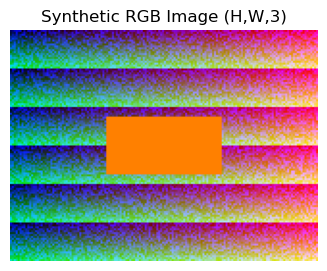

In [75]:
import numpy as np
import matplotlib.pyplot as plt

def make_synthetic_rgb(h=120, w=160, seed=0):
    rng = np.random.default_rng(seed)
    img = np.zeros((h, w, 3), dtype=np.uint8)
    # gradient in R channel
    img[..., 0] = np.clip(np.linspace(0, 255, w).astype(np.uint8)[None, :], 0, 255)
    # vertical stripes in G
    img[..., 1] = ((np.arange(h)[:, None] % 20) * 12).astype(np.uint8)
    # random speckles in B
    img[..., 2] = rng.integers(0, 255, size=(h, w), dtype=np.uint8)
    # draw a solid rectangle in the center
    ch, cw = h//2, w//2
    img[ch-15:ch+15, cw-30:cw+30, :] = [255, 128, 0]
    return img

IMG = make_synthetic_rgb()
plt.figure(figsize=(5,3))
plt.imshow(IMG)
plt.title("Synthetic RGB Image (H,W,3)")
plt.axis('off')
plt.show()

This is the image as a `numpy.array` 

In [76]:
IMG

array([[[  0,   0,  94],
        [  1,   0, 129],
        [  3,   0, 193],
        ...,
        [251,   0, 107],
        [253,   0,  11],
        [255,   0, 162]],

       [[  0,  12,  57],
        [  1,  12, 102],
        [  3,  12,  60],
        ...,
        [251,  12,  90],
        [253,  12, 208],
        [255,  12, 164]],

       [[  0,  24,  55],
        [  1,  24, 171],
        [  3,  24, 106],
        ...,
        [251,  24, 170],
        [253,  24, 182],
        [255,  24, 240]],

       ...,

       [[  0, 204,  72],
        [  1, 204,  81],
        [  3, 204,  88],
        ...,
        [251, 204, 241],
        [253, 204,  94],
        [255, 204, 231]],

       [[  0, 216,  51],
        [  1, 216,  95],
        [  3, 216,  21],
        ...,
        [251, 216,  65],
        [253, 216, 139],
        [255, 216,  75]],

       [[  0, 228, 201],
        [  1, 228,  92],
        [  3, 228, 247],
        ...,
        [251, 228, 244],
        [253, 228, 245],
        [255, 228,  40]]

**R12 — Basic Image Information**

a) What is the `shape` of `IMG`?  
b) How many rows, columns, and color channels does it have?

In [77]:
# a) Shape of IMG
print("a) Shape:", IMG.shape)

# b) Rows, columns, channels
h, w, c = IMG.shape
print("b) Rows:", h)
print("   Columns:", w)
print("   Channels:", c)


a) Shape: (120, 160, 3)
b) Rows: 120
   Columns: 160
   Channels: 3


**R13 — Inspect a Specific Pixel**

Access the pixel at the **center** of the image and print its RGB values.

**Tip:** Use indexing like `IMG[row, col]`

In [78]:
# Compute center coordinates
h, w, _ = IMG.shape
center_pixel = IMG[h//2, w//2]

print("Center pixel RGB:", center_pixel)


Center pixel RGB: [255 128   0]


**R14 — Separate Color Channels**

Create three arrays:
```python
R = IMG[..., 0]
G = IMG[..., 1]
B = IMG[..., 2]
```

Now visualize `plt.imshow(R)`, `plt.imshow(G)` and `plt.imshow(B)`

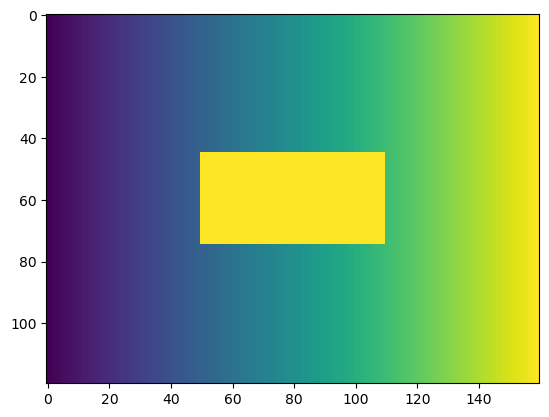

In [ ]:
R = IMG[..., 0]
G = IMG[..., 1]
B = IMG[..., 2]

plt.imshow(R);

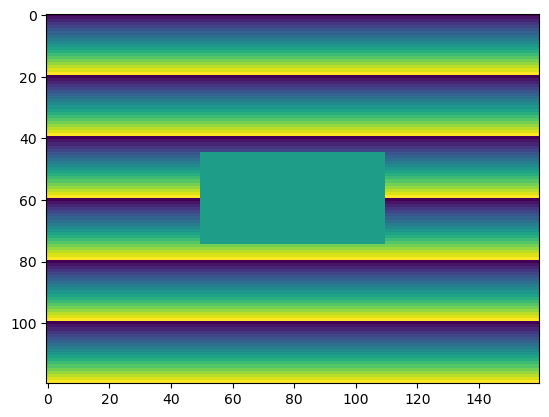

In [80]:
plt.imshow(G);

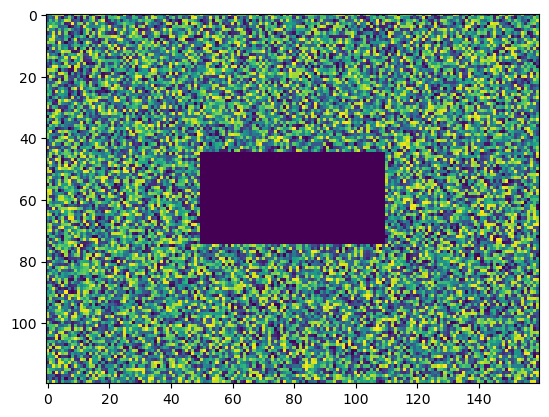

In [81]:
plt.imshow(B);

**R15 — Transpose the matrix and use `plt.imshow(transposed)`:**

- a) Any visual change?
- b) what happened to the **width** and **height**?

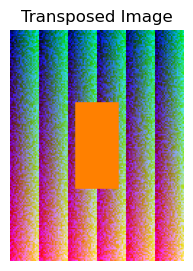

Original shape: (120, 160, 3)
Transposed shape: (160, 120, 3)


In [ ]:
# Transpose the image matrix (swap height and width)
T = IMG.transpose(1, 0, 2)

plt.figure(figsize=(5,3))
plt.imshow(T)
plt.title("Transposed Image")
plt.axis('off')
plt.show()

print("Original shape:", IMG.shape)
print("Transposed shape:", T.shape)


a) Any visual change?
- Yes, the image appears rotated 90 degrees because transposing swaps rows and columns.

b) What happened to the width and height?
- The height and width swapped places, causing the rotation effect.

**R16 — Create a copy of `IMG` and set one channel to zero:**

```python
copy_img = IMG.copy()
copy_img["select all columns and all rows", "0, 1 or 2"] = 0
plt.imshow(copy_img)
```

**Which colors dominate now?**

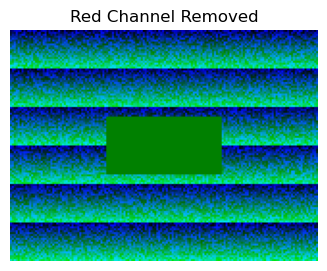

In [83]:
copy_img = IMG.copy()

# Example: zero out the Red channel (channel 0)
copy_img[:, :, 0] = 0

plt.figure(figsize=(5,3))
plt.imshow(copy_img)
plt.title("Red Channel Removed")
plt.axis('off')
plt.show()


If you set channel 0 (Red) to zero:
- The image becomes dominated by greens and blues.

## Appendix — NumPy Cheatsheet & Pitfalls
**Cheatsheet**
- Creation: `np.array`, `np.arange`, `np.linspace`, `np.zeros`, `np.ones`, `np.eye`
- Types: `arr.dtype`, cast with `arr.astype(...)`, `arr.itemsize`
- Shapes: `arr.shape`, `arr.ndim`, `arr.size`, `arr.reshape`, `arr.ravel`
- Indexing: `arr[i,j]`, slices (`start:stop:step`), fancy indexing
- Stacking: `np.vstack`, `np.hstack`, `np.concatenate([...], axis=...)`
- Aggregations: `mean`, `std`, `sum`, `max`, `argmax` with `axis=`
- Linear algebra: `np.dot`, `@`, `np.linalg.norm`

**Pitfalls**
- Slices are **views** (mutations reflect upstream). Fancy indexing creates **copies**.
- Beware of shape mismatches in broadcasting; add axes with `None/np.newaxis`.
- **Keep track of shapes between steps; print shapes often**
